In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
df = pd.read_csv('b1abb33c4f.csv')
df['GESTACAO'] = df['GESTACAO'].map({
    'Menos de 22 semanas': '-22',
    '22 a 27 semanas': '22-27',
    '28 a 31 semanas': '28-31',
    '32 a 36 semanas': '32-36',
    '37 a 41 semanas': '37-41',
    '42 semanas e mais':'42+'
})

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
asfixia_grave = df['APGAR5'] <= 3
asfixia_mod = (df['APGAR5'] >= 4) & (df['APGAR5'] <= 5)
asfixia_leve = (df['APGAR5'] >= 6) & (df['APGAR5'] <= 7)
normal = df['APGAR5'] >= 8 

In [4]:
df.loc[asfixia_grave, 'APGAR5_CAT'] = 'asfixia grave'
df.loc[asfixia_mod, 'APGAR5_CAT'] = 'asfixia moderada'
df.loc[asfixia_leve, 'APGAR5_CAT'] = 'asfixia leve'
df.loc[normal, 'APGAR5_CAT'] = 'normal'

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<AxesSubplot:xlabel='GESTACAO', ylabel='count'>

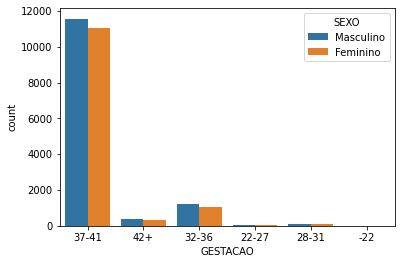

In [5]:
sns.countplot(data=df, x='GESTACAO', hue='SEXO')

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
-22,1,0,1,0,0,0,0,1,0,3,1
22-27,7,0,8,6,1,0,2,10,24,19,8
28-31,0,0,2,1,5,7,7,11,61,55,13
32-36,2,2,2,2,8,11,17,56,362,1307,465
37-41,5,20,3,5,7,21,45,151,1417,13565,7284
42+,1,0,0,0,0,1,1,5,44,423,223


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [8]:
soma_linhas = freq.sum(axis=1)
freq_pclin = freq.div(soma_linhas, axis=0)
freq_pclin * 100

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
-22,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714
22-27,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28-31,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32-36,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37-41,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42+,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

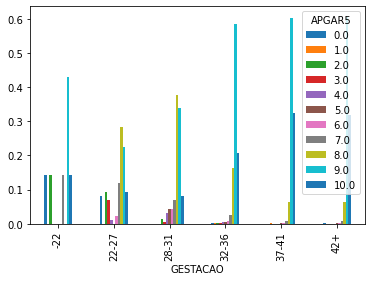

In [12]:
freq_pclin.plot.bar()

Pelo gráfico acima, vemos que nascimentos prematuros têm pior índice de APGAR 5 que não prematuros, especialmente abaixo das 32 semanas.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

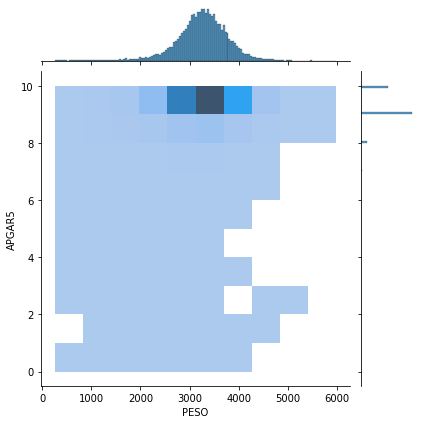

In [17]:
sns.jointplot(data=df, x='PESO', y='APGAR5', kind='hist', bins=[10,10])

Com o gráfico acima, podemos concluir que bebês com APGAR 5 menos que 8 não costumam passar do 5 quilos, também tendo uma média de peso menor.